<a href="https://colab.research.google.com/github/CodeHunterOfficial/A_PythonLibraries/blob/main/NV/%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0%20Plotly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Библиотека Plotly

#### Введение

Plotly — это мощная библиотека для визуализации данных в Python, которая позволяет создавать интерактивные графики и диаграммы. Одной из главных особенностей Plotly является поддержка интерактивности — пользователи могут приближать, отдалять, наводить мышью на отдельные элементы графика для получения более подробной информации. В отличие от таких библиотек, как Matplotlib и Seaborn, Plotly предоставляет более современные и гибкие способы взаимодействия с графиками.

Plotly имеет несколько важных модулей:
- `plotly.graph_objects` (часто используемый для низкоуровневого контроля и кастомизации),
- `plotly.express` (более простой и удобный для быстрого создания визуализаций),
- Веб-платформа для создания дашбордов и визуализаций.

#### Установка

Для работы с Plotly необходимо установить библиотеку:


In [ ]:
pip install plotly

Теперь перейдем к изучению возможностей Plotly.

---

### Основы работы с Plotly

##### 1. Работа с `plotly.express` для создания базовых графиков

Модуль `plotly.express` (или сокращённо `px`) предоставляет высокоуровневый API для создания графиков всего несколькими строками кода. Он работает аналогично другим библиотекам визуализации, таким как Seaborn, где данные передаются в виде DataFrame и графики создаются на их основе.

##### Пример 1: Линейный график

Рассмотрим создание простого линейного графика. Для этого используем метод `line()` из `plotly.express`.

In [ ]:
import plotly.express as px
import pandas as pd

# Создадим простой DataFrame с данными
data = {'Year': [2017, 2018, 2019, 2020, 2021],
        'Sales': [120, 180, 240, 300, 350]}

df = pd.DataFrame(data)

# Создание линейного графика
fig = px.line(df, x='Year', y='Sales', title='Sales Over Years')

# Отображение графика
fig.show()



**Объяснение**:
- Мы создаём простой DataFrame с данными о продажах по годам.
- Затем используем функцию `px.line()`, чтобы построить линейный график с `Year` по оси X и `Sales` по оси Y.
- Функция `show()` выводит график в интерактивном виде.

##### Пример 2: Точечная диаграмма (Scatter Plot)

Точечные диаграммы полезны для отображения зависимостей между двумя переменными. Следующий код демонстрирует, как это делается с помощью Plotly.


In [ ]:
# Используем встроенный набор данных о цветках iris
df = px.data.iris()

# Построение точечной диаграммы
fig = px.scatter(df, x='sepal_width', y='sepal_length', color='species',
                 title='Iris Dataset: Sepal Width vs Sepal Length')

fig.show()


**Объяснение**:
- Мы используем встроенный набор данных `iris`, который представляет собой информацию о различных видах цветков.
- С помощью функции `px.scatter()` создаётся точечная диаграмма, где `sepal_width` выступает как ось X, а `sepal_length` — как ось Y.
- Аргумент `color='species'` раскрашивает точки в зависимости от вида цветка, что добавляет ясности визуализации.

---

### Работа с `plotly.graph_objects` для более сложных графиков

Модуль `graph_objects` предлагает больше возможностей для кастомизации графиков. Он позволяет более тонко контролировать создание графиков, добавлять множество настроек и работать с несколькими типами диаграмм на одном графике.

##### Пример 3: Построение линейного графика с использованием `graph_objects`


In [ ]:
import plotly.graph_objects as go

# Данные
years = [2017, 2018, 2019, 2020, 2021]
sales = [120, 180, 240, 300, 350]

# Создание объекта Figure
fig = go.Figure()

# Добавление линейного графика
fig.add_trace(go.Scatter(x=years, y=sales, mode='lines+markers', name='Sales'))

# Добавление заголовков и меток
fig.update_layout(title='Sales Over Years with Custom Layout',
                  xaxis_title='Year',
                  yaxis_title='Sales',
                  template='plotly_dark')  # Использование темной темы

# Отображение графика
fig.show()

**Объяснение**:
- Мы вручную создаём объект графика `Figure` и добавляем на него трассу (`add_trace`), которая представляет собой линейный график с маркерами (`lines+markers`).
- Используем `update_layout` для добавления кастомных меток осей и заголовков, а также применяем тему `plotly_dark` для изменения стиля графика.

##### Пример 4: Гистограмма

Гистограммы — это важный инструмент для анализа распределения данных. В Plotly можно легко создать гистограмму как в `plotly.express`, так и в `plotly.graph_objects`.

In [ ]:
# Набор данных о цветках
df = px.data.iris()

# Построение гистограммы
fig = go.Figure()

# Добавляем гистограмму
fig.add_trace(go.Histogram(x=df['sepal_width'], name='Sepal Width', opacity=0.75))

# Кастомизация графика
fig.update_layout(title='Distribution of Sepal Width',
                  xaxis_title='Sepal Width',
                  yaxis_title='Count',
                  bargap=0.1)  # Расстояние между столбцами

fig.show()

**Объяснение**:
- Мы используем гистограмму для анализа распределения ширины чашелистика (`sepal_width`).
- Параметр `opacity` контролирует прозрачность столбцов, а `bargap` — расстояние между ними.

---

### Взаимодействие с данными и создание сложных графиков

Plotly поддерживает добавление интерактивных элементов, таких как фильтры, а также комбинирование различных графиков.

##### Пример 5: Подграфики и мульти-графики

Многим аналитикам приходится строить несколько графиков на одном холсте для удобного сравнения данных.

In [ ]:
from plotly.subplots import make_subplots

# Создание холста для 2 подграфиков
fig = make_subplots(rows=1, cols=2, subplot_titles=('Sepal Width', 'Sepal Length'))

# Добавление первого графика
fig.add_trace(go.Scatter(x=df['sepal_width'], y=df['petal_width'], mode='markers', name='Sepal Width vs Petal Width'),
              row=1, col=1)

# Добавление второго графика
fig.add_trace(go.Scatter(x=df['sepal_length'], y=df['petal_length'], mode='markers', name='Sepal Length vs Petal Length'),
              row=1, col=2)

# Обновление разметки
fig.update_layout(title_text='Comparing Sepal and Petal Features')

fig.show()

**Объяснение**:
- Мы используем функцию `make_subplots` для создания сетки из двух графиков (в один ряд, два столбца).
- Далее добавляем два точечных графика в разные ячейки с помощью параметров `row` и `col`.

##### Пример 6: Комбинирование нескольких типов графиков

Plotly позволяет комбинировать разные типы графиков на одном холсте.


In [ ]:
# Создание комбинированного графика
fig = go.Figure()

# Линия продаж
fig.add_trace(go.Scatter(x=years, y=sales, mode='lines', name='Sales'))

# Гистограмма продаж
fig.add_trace(go.Bar(x=years, y=[10, 20, 30, 40, 50], name='Revenue'))

# Кастомизация графика
fig.update_layout(title='Sales and Revenue Comparison',
                  xaxis_title='Year',
                  yaxis_title='Values')

fig.show()


**Объяснение**:
- В этом примере мы комбинируем линейный график (`Scatter`) и гистограмму (`Bar`) на одном графике для отображения двух разных наборов данных.

---

### Интерактивность и анимация

Plotly позволяет не только статичные графики, но и анимированные визуализации, которые могут изменяться с течением времени.

##### Пример 7: Анимированный график


In [ ]:
df = px.data.gapminder()

# Анимированная линейная диаграмма
fig = px.line(df, x='year', y='gdpPercap', color='continent', line_group='country',
              animation_frame='year', animation_group='country',
              title='GDP per Capita over Time')

fig.show()

**Объяснение**:
- Используя функцию `px.line()`, мы создаём анимацию, где каждая "фрейм" анимации — это данные за определённый год

 (`animation_frame='year'`).
- Анимация помогает увидеть, как меняется ВВП на душу населения со временем для разных континентов.



### Продвинутые возможности Plotly

Мы уже рассмотрели базовые примеры использования библиотеки Plotly для построения линейных графиков, гистограмм, а также комбинированных графиков и анимаций. Теперь давайте углубимся в более сложные возможности Plotly, такие как 3D графики, тепловые карты (heatmaps), графики плотности (density plots), и построение интерактивных дашбордов.

#### 1. 3D Графики

Plotly поддерживает создание 3D графиков, что позволяет более наглядно представлять данные в трёхмерном пространстве. Этот инструмент особенно полезен для анализа многомерных данных.

##### Пример 1: 3D точечная диаграмма (Scatter Plot)

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Создаем данные для 3D графика
x = np.random.randn(100)
y = np.random.randn(100)
z = np.random.randn(100)

# Создание 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5, color=z, colorscale='Viridis'))])

# Кастомизация графика
fig.update_layout(title='3D Scatter Plot', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

fig.show()

**Объяснение**:
- Мы генерируем случайные данные для трёх осей с помощью `numpy`.
- Используя `Scatter3d()`, строим трёхмерную точечную диаграмму. Цвет маркеров изменяется в зависимости от значения оси Z.
- Настраиваем оси с помощью параметра `scene`, а цвет маркеров изменяется с помощью параметра `colorscale`.

##### Пример 2: 3D поверхностный график (Surface Plot)

3D поверхности полезны для визуализации функций и моделей данных.

In [ ]:
# Данные для 3D поверхности
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Построение 3D поверхности
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])

# Кастомизация графика
fig.update_layout(title='3D Surface Plot', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))

fig.show()


**Объяснение**:
- Мы используем функцию от двух переменных \( z = \sin(\sqrt{x^2 + y^2}) \), чтобы создать данные для поверхности.
- `Surface()` создаёт график поверхности, а параметры `scene` задают настройки для осей.

---

#### 2. Тепловые карты (Heatmaps)

Тепловые карты отображают двумерные данные в виде цветной матрицы. Это отличный инструмент для отображения корреляционных матриц, распределений плотности и других числовых данных.

##### Пример 3: Тепловая карта корреляций


In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

# Загрузка данных Iris с использованием Seaborn
df = sns.load_dataset('iris')

# Убираем текстовые столбцы, оставляя только числовые для корреляционной матрицы
corr_matrix = df.select_dtypes(include=[float, int]).corr()

# Построение тепловой карты (heatmap) с помощью Plotly
fig = go.Figure(data=go.Heatmap(z=corr_matrix.values, x=corr_matrix.columns, y=corr_matrix.columns, colorscale='Viridis'))

# Настройки графика
fig.update_layout(title='Correlation Heatmap')
fig.show()
corr_matrix = df.select_dtypes(include=[float, int]).corr()

**Объяснение**:
- Мы загружаем данные `iris` и вычисляем корреляционную матрицу с помощью `df.corr()`.
- Затем строим тепловую карту с помощью `Heatmap()`, где оси X и Y обозначают переменные, а цвет показывает степень корреляции.

---

#### 3. Графики плотности

Графики плотности (density plots) полезны для отображения распределения данных и показывают, где данные концентрируются.

##### Пример 4: Диаграмма плотности

In [ ]:
import plotly.express as px

# Загружаем набор данных о цветках iris
df = px.data.iris()

# Построение графика плотности
fig = px.density_contour(df, x='sepal_width', y='sepal_length', color='species', marginal_x='histogram', marginal_y='histogram')

# Настройка графика
fig.update_layout(title='Density Contour Plot')

fig.show()


**Объяснение**:
- В этом примере мы строим контурные линии плотности для переменных `sepal_width` и `sepal_length` по каждому виду цветков.
- Добавляем гистограммы по осям X и Y с помощью аргументов `marginal_x` и `marginal_y`.

---

#### 4. Трёхмерные векторные поля

Для анализа векторных данных, таких как скорость или направление ветра, можно использовать векторные графики.

##### Пример 5: 3D Векторное поле

In [ ]:
# Данные для 3D векторного поля
x = np.arange(0, 10, 1)
y = np.arange(0, 10, 1)
z = np.zeros_like(x)

u = np.sin(x)  # Вектор по X
v = np.cos(y)  # Вектор по Y
w = np.ones_like(z)  # Вектор по Z

# Создание 3D векторного графика
fig = go.Figure(data=go.Cone(x=x, y=y, z=z, u=u, v=v, w=w, colorscale='Blues'))

# Настройка графика
fig.update_layout(title='3D Vector Field')

fig.show()

**Объяснение**:
- Здесь мы создаём набор векторов, заданных координатами X, Y и Z и их компонентами в направлениях U, V и W.
- Используем объект `Cone()`, который визуализирует векторы в трёхмерном пространстве в виде конусов.

---

#### 5. Интерактивные Dash-дэшборды с Dash

Помимо создания графиков в Jupyter-ноутбуках и интерактивных графиках, Plotly поддерживает создание дэшбордов и веб-приложений с помощью библиотеки Dash. Dash позволяет объединить графики Plotly и виджеты управления на одной странице, создавая полноценные приложения.

##### Пример 6: Создание простого Dash-приложения

Для начала работы с Dash нужно установить библиотеку:

In [ ]:
pip install dash

Далее создадим простое веб-приложение с интерактивным графиком.


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Инициализация приложения
app = dash.Dash(__name__)

# Загрузка данных
df = px.data.gapminder()

# Определение макета приложения
app.layout = html.Div([
    html.H1("Interactive GDP per Capita Graph"),
    dcc.Dropdown(
        id='continent-dropdown',
        options=[{'label': continent, 'value': continent} for continent in df['continent'].unique()],
        value='Asia'
    ),
    dcc.Graph(id='gdp-graph')
])

# Определение интерактивной логики
@app.callback(
    Output('gdp-graph', 'figure'),
    [Input('continent-dropdown', 'value')]
)
def update_graph(selected_continent):
    filtered_df = df[df['continent'] == selected_continent]
    fig = px.line(filtered_df, x='year', y='gdpPercap', color='country', title=f'GDP per Capita in {selected_continent}')
    return fig

# Запуск приложения
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

**Объяснение**:
- Это простое приложение с выпадающим меню для выбора континента и графиком, который обновляется при изменении выбора.
- Dash позволяет легко связывать интерактивные элементы (выпадающие меню, слайдеры) с графиками.



# Работа с временными рядами в Plotly

Временные ряды (time series) — это набор данных, где каждое наблюдение привязано к определённому времени. Такие данные широко используются в экономике, финансах, метеорологии и других сферах. Plotly предоставляет отличные инструменты для работы с временными рядами и их визуализации, поддерживая интерактивные графики, анимации и возможности для глубокого анализа.

## 1. Визуализация временных рядов с использованием Plotly Express

### Пример 1: Линейный график временного ряда

In [ ]:
import plotly.express as px
import pandas as pd

# Создание данных для временного ряда
data = {
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'Value': pd.Series(range(100)) + pd.Series(range(100)).apply(lambda x: x * 0.5)
}
df = pd.DataFrame(data)

# Построение линейного графика временного ряда
fig = px.line(df, x='Date', y='Value', title='Simple Time Series Line Plot')

fig.show()

**Объяснение:**

- Мы создаём DataFrame с двумя колонками: `Date` (даты с шагом в один день) и `Value` (значения, которые растут со временем).
- Используя функцию `px.line()`, мы строим линейный график временного ряда, где по оси X откладываются даты, а по оси Y — значения.

### Пример 2: График с несколькими временными рядами

Часто возникает необходимость визуализировать несколько временных рядов на одном графике для их сравнения.


In [ ]:
# Создание данных для нескольких временных рядов
data = {
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'Series1': pd.Series(range(100)) + pd.Series(range(100)).apply(lambda x: x * 0.5),
    'Series2': pd.Series(range(100)) + pd.Series(range(100)).apply(lambda x: x * 0.3) + 10
}
df = pd.DataFrame(data)

# Построение линейного графика для нескольких временных рядов
fig = px.line(df, x='Date', y=['Series1', 'Series2'], title='Multiple Time Series Plot')

fig.show()

**Объяснение:**

- В этом примере мы создаём два временных ряда (`Series1` и `Series2`) и визуализируем их на одном графике.
- Аргумент `y` принимает список колонок, что позволяет отображать несколько серий на одном графике для удобного сравнения.

## 2. Работа с аномалиями во временных рядах

Для анализа временных рядов часто бывает важно выявить аномалии, такие как выбросы (outliers), пики и другие нестандартные поведения.

### Пример 3: Выделение аномалий

In [ ]:
import numpy as np

# Создание данных с выбросами
data = {
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'Value': pd.Series(range(100)) + np.random.normal(0, 1, 100)
}
# Добавляем выбросы
data['Value'][[20, 50, 80]] = [50, 100, 150]
df = pd.DataFrame(data)

# Построение линейного графика
fig = px.line(df, x='Date', y='Value', title='Time Series with Anomalies')

# Выделение аномальных значений
anomalies = df[df['Value'] > 40]
fig.add_scatter(x=anomalies['Date'], y=anomalies['Value'], mode='markers', name='Anomalies', marker=dict(color='red', size=10))

fig.show()

**Объяснение:**

- Мы создаём набор данных с некоторыми выбросами (аномалиями) на позициях 20, 50 и 80.
- После построения линейного графика временного ряда, мы выделяем аномалии с помощью красных маркеров, добавляя их с помощью функции `add_scatter()`.

## 3. Скользящие средние и агрегирование данных

Для анализа временных рядов часто используются скользящие средние и другие методы сглаживания для устранения шума и выявления трендов.

### Пример 4: Скользящее среднее

In [ ]:
# Добавление скользящего среднего
df['SMA_10'] = df['Value'].rolling(window=10).mean()

# Построение графика со скользящим средним
fig = px.line(df, x='Date', y='Value', title='Time Series with Moving Average')

# Добавляем скользящее среднее на график
fig.add_scatter(x=df['Date'], y=df['SMA_10'], mode='lines', name='10-Day SMA', line=dict(color='orange'))

fig.show()

**Объяснение:**

- Мы добавляем колонку `SMA_10`, которая содержит 10-дневное скользящее среднее для данных.
- Далее строим линейный график временного ряда и добавляем на него скользящее среднее оранжевой линией с помощью `add_scatter()`.

### Пример 5: Агрегация данных по месяцам

Когда временные ряды содержат большие объёмы данных, полезно агрегировать их для лучшего понимания тенденций.

In [ ]:
# Агрегирование данных по месяцам
df['Month'] = df['Date'].dt.to_period('M').dt.to_timestamp()
monthly_data = df.groupby('Month').agg({'Value': 'mean'}).reset_index()

# Построение графика агрегированных данных
fig = px.line(monthly_data, x='Month', y='Value', title='Monthly Aggregated Time Series')

fig.show()

**Объяснение:**

- Мы создаём новую колонку `Month`, которая содержит месяцы.
- Затем агрегируем данные, рассчитывая среднее значение по месяцам с помощью метода `groupby()`, и строим график агрегированных данных.

## 4. Сезонность и тренды

Одним из ключевых аспектов анализа временных рядов является исследование сезонности и долгосрочных трендов.

### Пример 6: Расчёт тренда с помощью регрессии

In [ ]:
from sklearn.linear_model import LinearRegression

# Добавляем индекс для линейной регрессии
df['Index'] = np.arange(len(df))

# Построение модели линейной регрессии
X = df[['Index']]
y = df['Value']
model = LinearRegression().fit(X, y)

# Прогнозируем тренд
df['Trend'] = model.predict(X)

# Построение графика с трендом
fig = px.line(df, x='Date', y='Value', title='Time Series with Linear Trend')

# Добавляем тренд на график
fig.add_scatter(x=df['Date'], y=df['Trend'], mode='lines', name='Trend', line=dict(color='green'))

fig.show()

**Объяснение:**

- Мы создаём линейную модель регрессии с помощью библиотеки `scikit-learn`, используя индекс временного ряда как объясняющую переменную.
- Прогнозируем тренд и добавляем его на график зелёной линией для наглядного представления долгосрочной тенденции.

### Пример 7: Выделение сезонных колебаний

Для выделения сезонности можно использовать разложение временных рядов на компоненты: тренд, сезонность и остатки.

In [ ]:
import statsmodels.api as sm

# Разложение временного ряда
decomposition = sm.tsa.seasonal_decompose(df['Value'], period=12, model='additive')

# Построение графиков сезонности и тренда
fig1 = px.line(df, x='Date', y=decomposition.trend, title='Trend Component')
fig1.show()

fig2 = px.line(df, x='Date', y=decomposition.seasonal, title='Seasonal Component')
fig2.show()

**Объяснение:**

- Мы используем функцию `seasonal_decompose()` из библиотеки `statsmodels` для разложения временного ряда на тренд, сезонность и остатки.
- Отдельно строим графики для компоненты тренда и сезонности.

## 5. Анимации для временных рядов

Plotly также позволяет создавать анимированные графики для временных рядов, что особенно полезно для визуализации изменений данных с течением времени.

### Пример 8: Анимация временного ряда

In [ ]:
# Данные для анимации
df = px.data.gapminder()

# Анимированный график временного ряда
fig = px.line(df, x='year', y='gdpPercap', color='country',
              animation_frame='year', animation_group='country',
              title='GDP per Capita over Time')

fig.show()

**Объяснение:**

- Мы используем встроенный набор данных `gapminder`, который содержит информацию о ВВП

 на душу населения по странам на протяжении нескольких лет.
- С помощью аргументов `animation_frame` и `animation_group` создаем анимированный график, показывающий изменения во времени.


## 6. Интервалы доверия и предсказания

Добавление интервалов доверия к графикам позволяет оценить неопределенность в прогнозах и улучшить интерпретацию данных.

### Пример 9: Интервалы доверия для предсказания


In [ ]:
pip install statsmodels

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Модель экспоненциального сглаживания
model = ExponentialSmoothing(df['Value'], trend='add', seasonal='add', seasonal_periods=12).fit()
df['Forecast'] = model.forecast(steps=12)

# Получение оценок на основе модели
fitted_values = model.fittedvalues

# Доверительные интервалы
# Получаем предсказания на 12 шагов вперед
forecast_values = model.forecast(steps=12)

# Предполагаем, что стандартная ошибка остатков стабильна
stderr = model.resid.std()

# Создание доверительных интервалов
ci = 1.96 * stderr  # 95% доверительный интервал
lower_ci = forecast_values - ci
upper_ci = forecast_values + ci

# Создаем DataFrame для доверительных интервалов
forecast_index = pd.date_range(start=df['Date'].max() + pd.Timedelta(days=1), periods=12, freq='M')
pred_int_df = pd.DataFrame({'mean': forecast_values, 'lower_ci': lower_ci, 'upper_ci': upper_ci}, index=forecast_index)

# Построение графика с предсказанием и интервалами доверия
fig = px.line(df, x='Date', y='Value', title='Time Series with Forecast and Confidence Intervals')

# Добавляем предсказания и интервалы доверия
fig.add_scatter(x=df['Date'], y=fitted_values, mode='lines', name='Fitted', line=dict(color='orange'))
fig.add_scatter(x=pred_int_df.index, y=pred_int_df['mean'], mode='lines', name='Forecast', line=dict(color='blue'))
fig.add_scatter(x=pred_int_df.index, y=pred_int_df['lower_ci'], mode='lines', name='Lower CI', line=dict(color='lightblue', dash='dash'))
fig.add_scatter(x=pred_int_df.index, y=pred_int_df['upper_ci'], mode='lines', name='Upper CI', line=dict(color='lightblue', dash='dash'))

fig.show()

<ipython-input-47-4e084bbc5d0c>:23: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.




**Объяснение:**
- Мы используем метод экспоненциального сглаживания для создания прогноза и затем добавляем доверительные интервалы, что позволяет видеть диапазон возможных значений.

## 7. Взаимодействие с графиками

Plotly предоставляет интерактивные возможности, которые позволяют пользователю взаимодействовать с графиками, например, фильтрация данных и выбор диапазона.

### Пример 10: Интерактивные элементы для временных рядов

In [ ]:
import plotly.graph_objects as go

# Создание графика с интерактивными элементами
fig = go.Figure()

# Добавляем линейный график
fig.add_trace(go.Scatter(x=df['Date'], y=df['Value'], mode='lines', name='Value'))

# Добавляем элементы управления
fig.update_layout(title='Interactive Time Series', xaxis_title='Date', yaxis_title='Value',
                  updatemenus=[{
                      'buttons': [
                          {'label': 'Show All', 'method': 'update', 'args': [{'visible': [True]}]},
                          {'label': 'Hide Values', 'method': 'update', 'args': [{'visible': [False]}]},
                      ],
                      'direction': 'down',
                      'showactive': True,
                  }])

fig.show()


**Объяснение:**
- Здесь мы добавляем элементы управления, позволяя пользователям скрывать или показывать определенные данные на графике.

## 8. Временные ряды с различными частотами

Анализ данных с различными временными частотями может быть полезен для выявления различий в тенденциях.

### Пример 11: Работа с данными с различной частотой

In [ ]:
# Генерация данных с разной частотой
daily_data = {
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'Daily_Value': pd.Series(range(100)) + np.random.normal(0, 1, 100)
}
weekly_data = {
    'Date': pd.date_range(start='2020-01-01', periods=14, freq='W'),
    'Weekly_Value': pd.Series(range(14)) + np.random.normal(0, 2, 14)
}

daily_df = pd.DataFrame(daily_data)
weekly_df = pd.DataFrame(weekly_data)

# Построение графика с данными с различной частотой
fig = px.line(daily_df, x='Date', y='Daily_Value', title='Daily Time Series')
fig.add_scatter(x=weekly_df['Date'], y=weekly_df['Weekly_Value'], mode='lines', name='Weekly Value', line=dict(dash='dash'))

fig.show()

**Объяснение:**
- Мы создаем два набора данных (ежедневный и еженедельный) и отображаем их на одном графике, используя различные стили линий для обозначения различий в частоте.

## 9. Корреляция между временными рядами

Анализ взаимосвязи между несколькими временными рядами может дать интересные инсайты.

### Пример 12: Корреляция между временными рядами

In [ ]:
# Создание коррелирующих временных рядов
data = {
    'Date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
    'Series1': pd.Series(range(100)) + np.random.normal(0, 1, 100),
    'Series2': pd.Series(range(100)) + np.random.normal(0, 1, 100) + 5
}
df = pd.DataFrame(data)

# Построение графика с корреляцией
fig = px.scatter(df, x='Series1', y='Series2', title='Correlation between Series1 and Series2')
fig.update_traces(marker=dict(size=10, opacity=0.6))

fig.show()


**Объяснение:**
- Мы создаем два временных ряда, которые имеют положительную корреляцию, и визуализируем их с помощью диаграммы рассеяния.



## Вопросы для самопроверки

1. Что такое библиотека Plotly и для чего она используется?

2. Как установить библиотеку Plotly в Python?

3. В чем разница между `plotly.express` и `plotly.graph_objects`?

4. Как создать простой линейный график с использованием Plotly?

5. Что такое интерактивные графики и как они реализуются в Plotly?

6. Как добавить заголовок и метки осей к графику в Plotly?

7. Как визуализировать данные с помощью точечной диаграммы (scatter plot) в Plotly?

8. Как создать гистограмму и что она показывает?

9. Как настроить цвет и стиль линии на графике в Plotly?

10. Что такое 3D график и как его создать с помощью Plotly?

11. Как добавить несколько графиков на один холст с использованием подграфиков?

12. Что такое анимация в Plotly и как ее реализовать?

13. Как использовать функции для создания тепловой карты (heatmap) в Plotly?

14. Как выделить аномалии на графике временного ряда?

15. Что такое скользящее среднее и как его добавить к графику?

16. Как создать Dash-приложение для отображения интерактивного графика?

17. Как экспортировать график в различные форматы (PNG, JPEG и т.д.)?

18. Как использовать фильтры и выпадающие меню для управления данными на графике?

19. Что такое интервалы доверия и как их добавить к графику?

20. Как работать с данными из CSV файла и визуализировать их с помощью Plotly?

## Задачи для самостоятеьной работы

1. **Создание линейного графика**: Постройте линейный график для произвольных данных о температуре в течение недели.

2. **Точечная диаграмма**: Используя набор данных о цветках iris, создайте точечную диаграмму, отображающую зависимость между шириной и длиной лепестка.

3. **Гистограмма**: Постройте гистограмму для распределения значений одной из переменных в наборе данных о цветках iris.

4. **Кастомизация графика**: Измените цвет и стиль линии на линейном графике, добавив маркеры.

5. **Создание 3D графика**: Постройте 3D точечную диаграмму с случайными данными.

6. **Анимированный график**: Создайте анимированный график, показывающий изменение ВВП на душу населения по странам с течением времени.

7. **Скользящее среднее**: Добавьте к графику временного ряда линию скользящего среднего.

8. **Комбинированный график**: Постройте комбинированный график, который включает как линейный график, так и гистограмму.

9. **Тепловая карта**: Создайте тепловую карту, отображающую корреляцию между переменными в наборе данных о цветках iris.

10. **Создание подграфиков**: Постройте два подграфика на одном холсте для сравнения двух наборов данных.

11. **Интерактивный график**: Создайте интерактивный график с выпадающим меню, позволяющим выбирать разные наборы данных.

12. **Построение графика плотности**: Используйте данные о цветках iris для построения графика плотности.

13. **Работа с временными рядами**: Создайте линейный график временного ряда с данными о продажах за год.

14. **Выделение аномалий**: На графике временного ряда выделите аномальные точки красным цветом.

15. **Агрегация данных**: Агрегируйте данные по месяцам и постройте график для этих агрегированных данных.

16. **Регрессионный анализ**: Проведите линейную регрессию и отобразите её на графике.

17. **Интервалы доверия**: Добавьте интервалы доверия к графику прогноза временного ряда.

18. **Сезонность**: Выделите сезонные колебания на графике временного ряда.

19. **Векторное поле**: Постройте 3D векторное поле с использованием случайных данных.

20. **Создание Dash-приложения**: Создайте простое Dash-приложение, отображающее интерактивный график.

21. **Публикация графиков**: Научитесь публиковать графики Plotly в Интернете.

22. **Кастомизация осей**: Измените метки и заголовки осей на графике.

23. **Сравнение нескольких графиков**: Постройте график, на котором одновременно отображаются несколько временных рядов.

24. **График с несколькими осями**: Создайте график с двумя осями Y для сравнения разных наборов данных.

25. **Использование разных цветов**: Настройте цвета графиков в зависимости от категорий в данных.

26. **Создание анимации**: Создайте анимацию, показывающую изменения в данных с течением времени.

27. **Построение графиков с использованием Plotly.graph_objects**: Создайте график, используя более низкоуровневый API Plotly.

28. **Работа с данными из CSV**: Загрузите данные из CSV файла и визуализируйте их с помощью Plotly.

29. **Сравнение графиков**: Постройте два графика рядом друг с другом для сравнения.

30. **Экспорт графиков**: Научитесь экспортировать графики в различные форматы (PNG, JPEG и т.д.).


##Примеры


Постройте линейный график для произвольных данных о температуре в течение недели

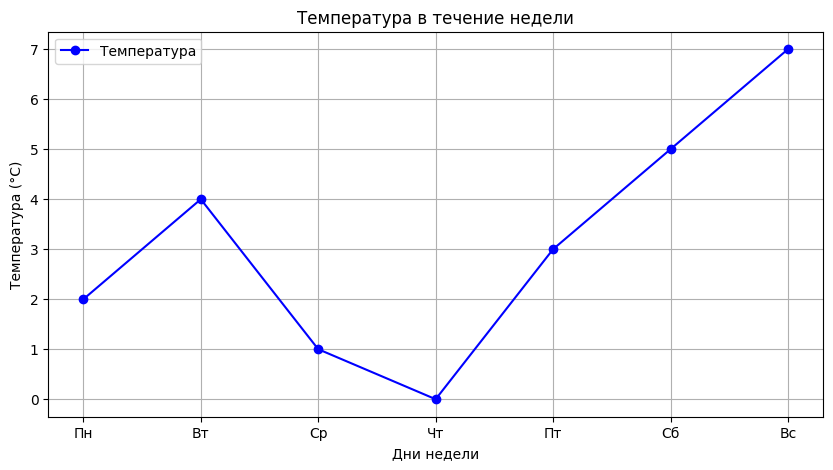

In [ ]:
import matplotlib.pyplot as plt

days = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

temperatures = [2, 4, 1, 0, 3, 5, 7]

plt.figure(figsize=(10, 5))
plt.plot(days, temperatures, marker='o', linestyle='-', color='blue', label='Температура')

plt.title('Температура в течение недели')
plt.xlabel('Дни недели')
plt.ylabel('Температура (°C)')
plt.legend()

plt.grid()
plt.show()

Научитесь экспортировать графики в различные форматы (PNG, JPEG и т.д.)

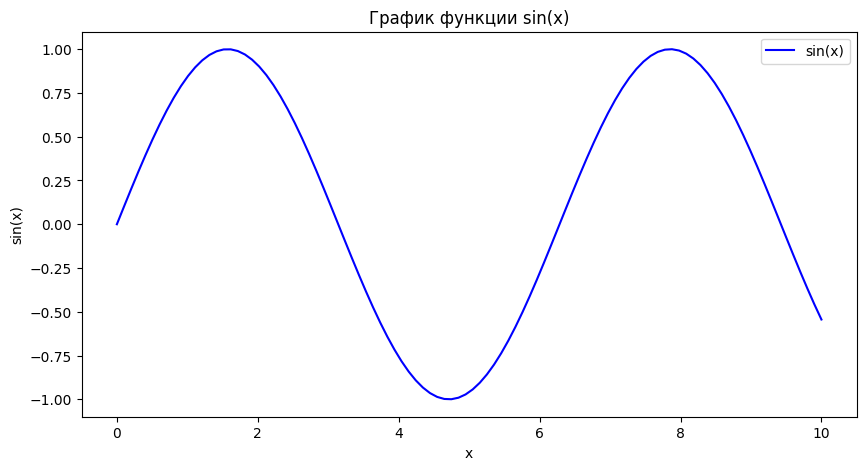

In [ ]:
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='sin(x)', color='blue')
plt.title('График функции sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()

plt.savefig('graph.png', format='png')

plt.savefig('graph.jpg', format='jpeg')

plt.show()

##Задачи для самостоятельной работы

1. **Создание 3D графика**: Постройте 3D точечную диаграмму с случайными данными.
2. **Работа с данными из CSV**: Загрузите данные из CSV файла и визуализируйте их с помощью Plotly.